In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

.data gives a 1d array and .images gives a 2d array 

<Figure size 640x480 with 0 Axes>

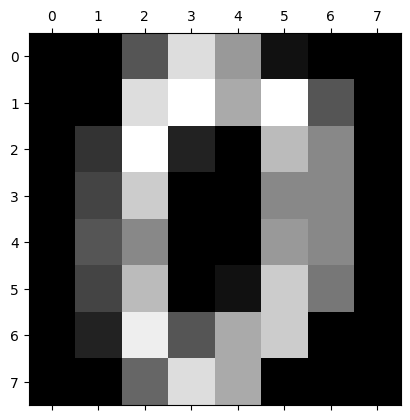

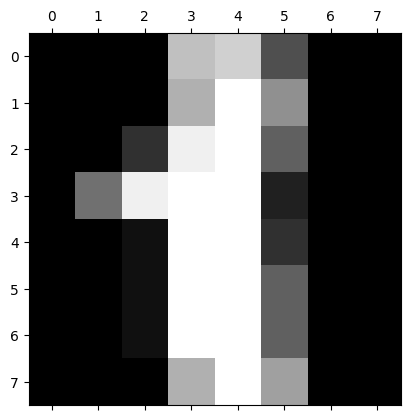

In [7]:
plt.gray()
for i in range(0,2):
    plt.matshow(digits.images[i])

In [8]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target, train_size=0.8)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
model.score(X_test,Y_test)

0.9777777777777777

Because the features are not scaled so it was taking a lot of iterations, so we had to increase that

In [24]:
model.predict([digits.data[67]])

array([6])

In [25]:
digits.target[67]

6

##### How to know where model did wrong?
We use confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
y_pred = model.predict(X_test)

In [28]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 41]], dtype=int64)

In [29]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

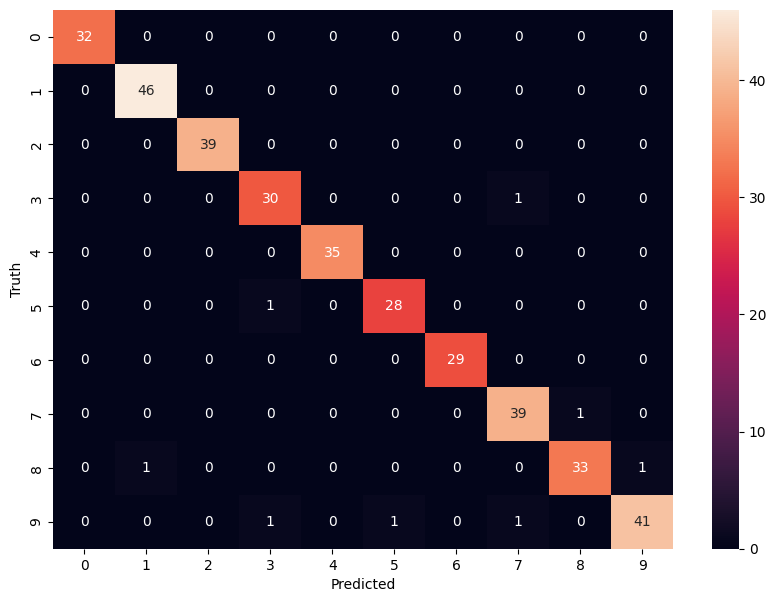

In [30]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')